# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import joblib
from tkinter import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("loan_data_set.csv")
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
 data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
data.shape

(614, 13)

In [5]:
data.Gender.value_counts(dropna=False)


Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64

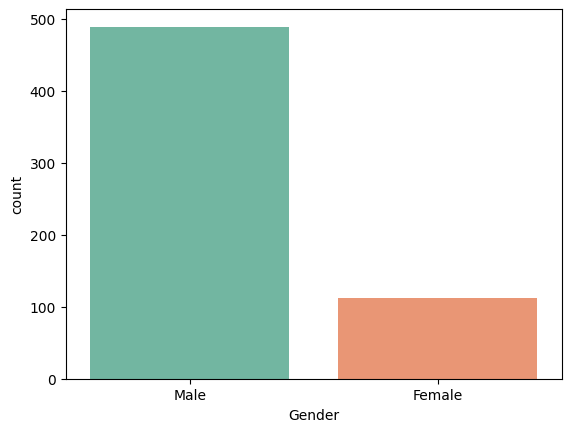

In [6]:
sns.countplot(x="Gender", data=data, palette="Set2")
plt.show()

In [7]:
data.Married.value_counts(dropna=False)


Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64

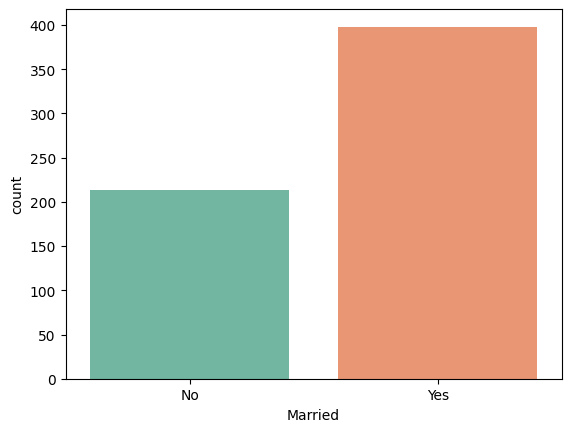

In [8]:
sns.countplot(x="Married", data=data, palette="Set2")
plt.show()

In [9]:
data.Education.value_counts(dropna=False)


Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

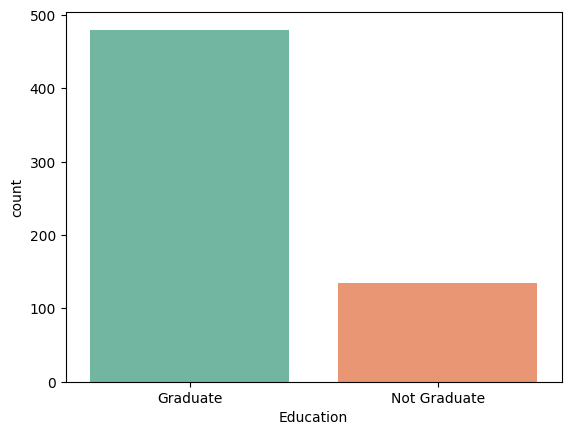

In [10]:
sns.countplot(x="Education", data=data, palette="Set2")
plt.show()

In [11]:
data.Self_Employed.value_counts(dropna=False)


Self_Employed
No     500
Yes     82
NaN     32
Name: count, dtype: int64

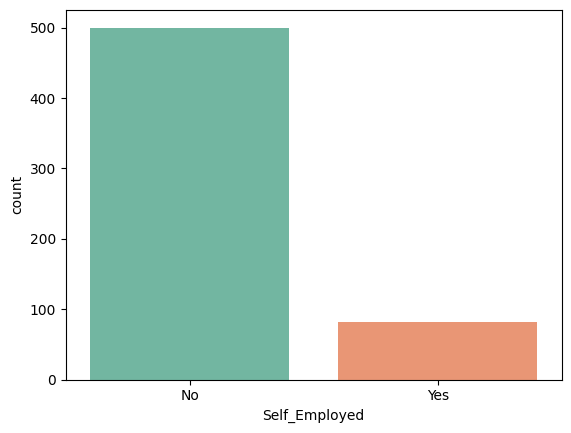

In [12]:
sns.countplot(x="Self_Employed", data=data, palette="Set2")
plt.show()

In [13]:
data.Credit_History.value_counts(dropna=False)


Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64

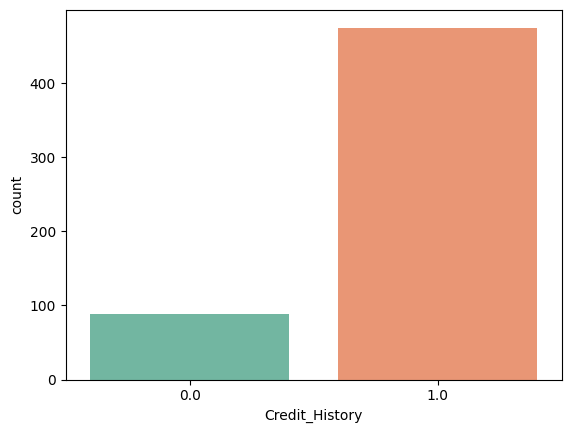

In [14]:
sns.countplot(x="Credit_History", data=data, palette="Set2")
plt.show()

In [15]:
data.Property_Area.value_counts(dropna=False)


Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

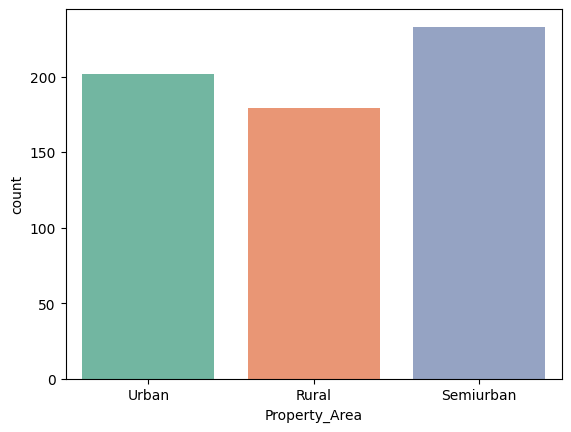

In [16]:
sns.countplot(x="Property_Area", data=data, palette="Set2")
plt.show()

In [17]:
data.Loan_Status.value_counts(dropna=False)


Loan_Status
Y    422
N    192
Name: count, dtype: int64

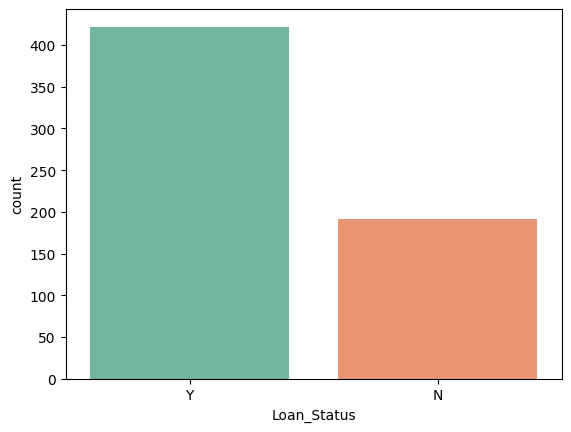

In [18]:
sns.countplot(x="Loan_Status", data=data, palette="Set2")
plt.show()

In [19]:
data.Loan_Amount_Term.value_counts(dropna=False)


Loan_Amount_Term
360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

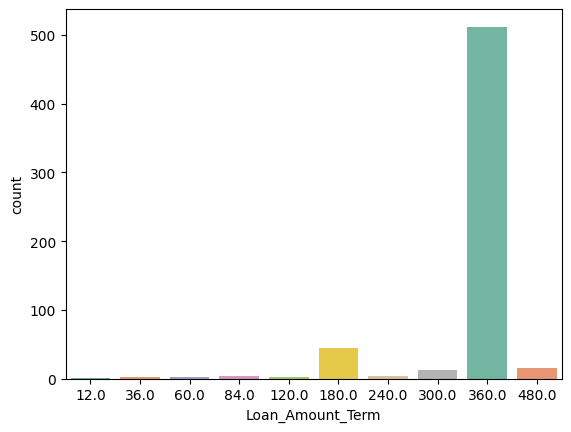

In [20]:
sns.countplot(x="Loan_Amount_Term", data=data, palette="Set2")
plt.show()

In [21]:
data[['Applicant_Income','Coapplicant_Income','Loan_Amount']].describe()

,Applicant_Income,Coapplicant_Income,Loan_Amount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


In [22]:
 data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    object 
 1   Gender              601 non-null    object 
 2   Married             611 non-null    object 
 3   Dependents          599 non-null    object 
 4   Education           614 non-null    object 
 5   Self_Employed       582 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         592 non-null    float64
 9   Loan_Amount_Term    600 non-null    float64
 10  Credit_History      564 non-null    float64
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [23]:
 data.isnull().sum()

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount           22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
dtype: int64

In [24]:
 data = data.drop('Loan_ID',axis=1)

In [25]:
columns = ['Gender','Dependents','Loan_Amount','Loan_Amount_Term']

In [26]:
 data = data.dropna(subset=columns)

In [27]:
data.replace({'Dependents':{'3+':4}},inplace=True)

In [28]:
#Imputing Missing values with mean for continuous variable
data['Loan_Amount'].fillna(data['Loan_Amount'].mean(), inplace=True)
data['Applicant_Income'].fillna(data['Applicant_Income'].mean(), inplace=True)


#Imputing Missing values with mode for categorical variables
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)

In [29]:
 data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

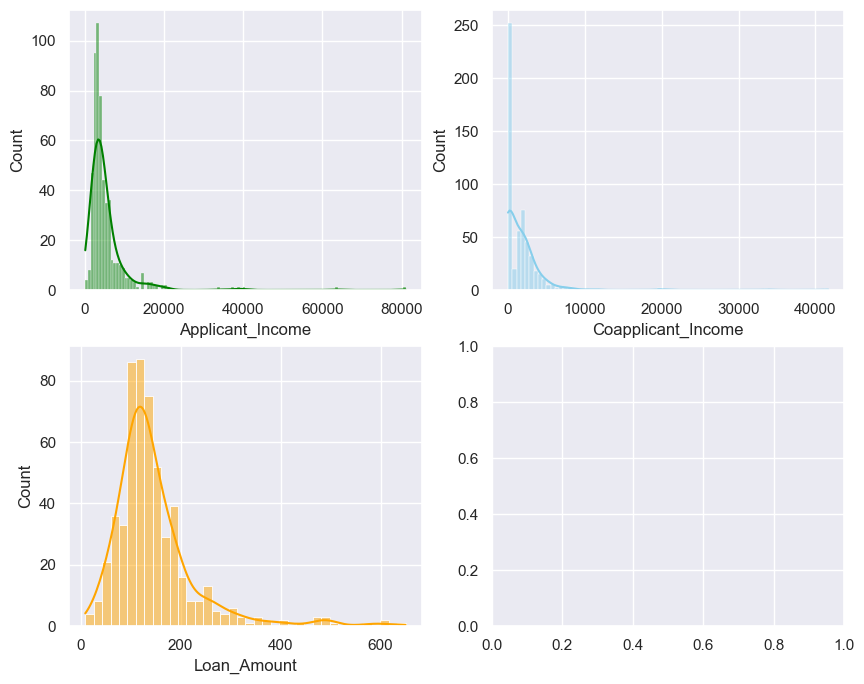

In [30]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=data, x="Applicant_Income", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=data, x="Coapplicant_Income", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=data, x="Loan_Amount", kde=True, ax=axs[1, 0], color='orange');

In [31]:
# Square Root Transformation

data.Applicant_Income = np.sqrt(data.Applicant_Income)
data.Coapplicant_Income = np.sqrt(data.Coapplicant_Income)
data.Loan_Amount = np.sqrt(data.Loan_Amount)

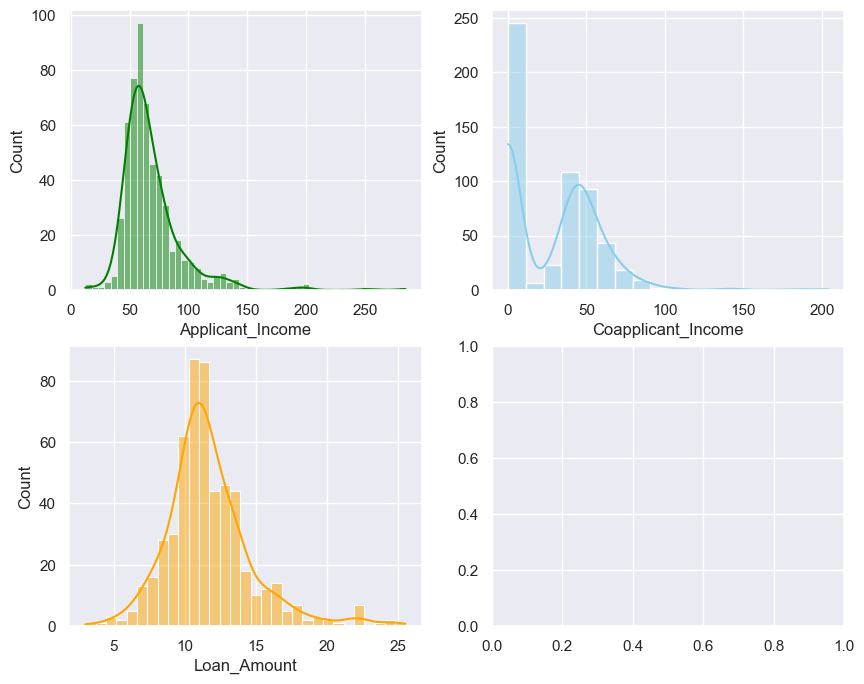

In [32]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
sns.histplot(data=data, x="Applicant_Income", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=data, x="Coapplicant_Income", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=data, x="Loan_Amount", kde=True, ax=axs[1, 0], color='orange');

In [33]:
from imblearn.over_sampling import SMOTE

In [34]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,67.697858,38.832976,11.313708,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,54.772256,0.000000,8.124038,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,50.823223,48.559242,10.954451,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,77.459667,0.000000,11.874342,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,73.600272,64.776539,16.340135,360.0,1.0,Urban,Y


In [35]:
data.replace({'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [36]:
data.replace({'Self_Employed':{'Yes':1,'No':0}},inplace=True)

In [37]:
data.replace({'Property_Area':{'Semiurban':0,'Urban':1,'Rural':2}},inplace=True)

In [38]:
data.replace({'Loan_Status':{'Y':1,'N':0}},inplace=True)

In [39]:
data.replace({'Gender':{'Male':1,"Female":0}},inplace=True)

In [40]:
data.replace({'Married':{'Yes':1,"No":0}},inplace=True)

In [41]:
 X = data.drop('Loan_Status',axis=1)

In [42]:
y = data['Loan_Status']

In [43]:
data.sample(5)


,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
392,1,1,0,1,0,50.823223,45.989129,10.954451,360.0,1.0,1,1
278,1,1,0,1,0,120.760093,0.000000,20.880613,360.0,1.0,0,1
292,1,1,2,1,0,56.151581,39.496835,11.575837,360.0,1.0,1,1
441,1,1,0,1,0,88.887569,42.813549,13.416408,360.0,1.0,2,1
480,0,0,0,0,0,65.954530,0.000000,12.409674,360.0,1.0,2,1


In [44]:
data.replace({'Dependents':{'3+':4}},inplace=True)

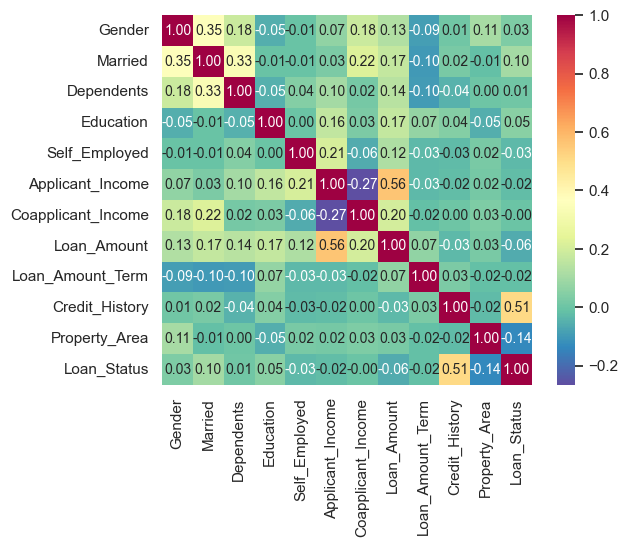

In [45]:
corrmat = data.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=data.columns, 
                 xticklabels=data.columns, 
                 cmap="Spectral_r")
plt.show()

In [46]:
cols = ['Applicant_Income','Coapplicant_Income','Loan_Amount','Loan_Amount_Term']

# Feature Selection

In [47]:
 st = StandardScaler()
X[cols]=st.fit_transform(X[cols])

In [48]:
 X

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,-0.023458,0.359352,-0.125338,0.279961,1.0,2
2,1,1,0,1,1,-0.517824,-0.966578,-1.174827,0.279961,1.0,1
3,1,1,0,0,0,-0.668864,0.691450,-0.243544,0.279961,1.0,1
4,1,0,0,1,0,0.349903,-0.966578,0.059125,0.279961,1.0,1
5,1,1,2,1,1,0.202293,1.245181,1.528494,0.279961,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,-0.553035,-0.966578,-1.075424,0.279961,1.0,2
610,1,1,4,1,0,-0.161904,-0.966578,-1.766907,-2.468292,1.0,2
611,1,1,1,1,0,0.823580,-0.437615,1.385643,0.279961,1.0,1
612,1,1,2,1,0,0.717869,-0.966578,0.651524,0.279961,1.0,1


# Splitting, training and testing the dataset

In [49]:
 x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.20,random_state = 0)
print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(442, 11)
(111, 11)
(442,)
(111,)


# Training the various models

In [50]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)
print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))
# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred))
8
# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.7207207207207207
F1 score : 0.8187134502923976
[[10 27]
 [ 4 70]]


In [51]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)
print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))
# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))
# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 1.0
Validation Accuracy : 0.6306306306306306
f1 score : 0.7388535031847134
[[12 25]
 [16 58]]


In [52]:
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)
print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))
# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))
# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.830316742081448
Validation Accuracy : 0.7297297297297297
f1 score : 0.8295454545454546
[[ 8 29]
 [ 1 73]]


In [53]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)
print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))
# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))
# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.8257918552036199
Validation Accuracy : 0.7387387387387387
f1 score : 0.8342857142857142
[[ 9 28]
 [ 1 73]]


In [54]:
model = GradientBoostingClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)
print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))
# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))
# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.916289592760181
Validation Accuracy : 0.7207207207207207
f1 score : 0.8187134502923976
[[10 27]
 [ 4 70]]


# Saving the model

In [55]:
X = data.drop('Loan_Status',axis=1)
y = data['Loan_Status']

In [56]:
#In previous exploration, it can be seen that the number between approved and rejected loan is imbalanced. In this section, oversampling technique will be used to avoid overfitting
X, y = SMOTE().fit_resample(X, y)

In [57]:
gbm = GradientBoostingClassifier(n_estimators=270,
 min_samples_split=5,
 min_samples_leaf=5,
 max_features='sqrt',
 max_depth=5)

In [58]:
gbm.fit(X,y)

GradientBoostingClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=5,
                           min_samples_split=5, n_estimators=270)

In [59]:
 joblib.dump(gbm,'loan_status_predict')

['loan_status_predict']

In [60]:
model = joblib.load('loan_status_predict')

In [61]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,67.697858,38.832976,11.313708,360.0,1.0,2,0
2,1,1,0,1,1,54.772256,0.000000,8.124038,360.0,1.0,1,1
3,1,1,0,0,0,50.823223,48.559242,10.954451,360.0,1.0,1,1
4,1,0,0,1,0,77.459667,0.000000,11.874342,360.0,1.0,1,1
5,1,1,2,1,1,73.600272,64.776539,16.340135,360.0,1.0,1,1


# Testing the dataset

In [62]:
# print("Loan Approval Prediction: ")
a=float(input("Enter the Gender:   "))
b=float(input("Enter the marriage status: "))
c=float(input("Enter the dependents: "))
d=float(input("Enter the education: "))
e=float(input("Enter the employment status: "))
f=float(input("Enter the Loan_Amount: "))
g=float(input("Enter the Loan_Amount_Term: "))
h=float(input("Enter the Credit_History: "))
i=float(input("Enter the Property_Area: "))
j=float(input("Enter the Applicant_Income: "))
k=float(input("Enter the Coapplicant_Income: "))
features=np.array([[a,b,c,d,e,f,g,h,i,j,k]])
print("Predicted Loan Status=",model.predict(features))

Enter the Gender:   2
Enter the marriage status: 0
Enter the dependents: 1
Enter the education: 0
Enter the employment status: 1
Enter the LoanAmount: 1000
Enter the Loan_Amount_Term: 120
Enter the Credit_History: 0
Enter the Property_Area: 1
Enter the Applicant_Income: 100
Enter the Coapplicant_Income: 100
Predicted Loan Status= [0]


In [63]:
result = model.predict(features)

In [64]:
if result==1:
 print("Loan Approved")
else:
 print("Loan Not Approved")

Loan Not Approved
